In [1]:
import catboost
import sklearn
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

### Example on generated data

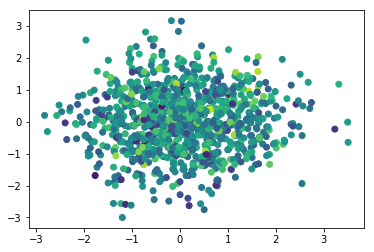

In [3]:
n_features = 3
X, y = make_regression(n_samples=1000, n_features=10, n_informative=n_features)
plt.scatter(X[:, 0], X[:, 1], c=y)
X = pd.DataFrame(X)
X.columns = ['Column_{}'.format(i) for i in range(X.shape[1])]

cat_values_1 = ['A', 'B', 'C']
cat_values_2 = ['some', 'random', 'categorical', 'feature', 'values', 'testing']
X.loc[:, 'CatColumn_1'] = [cat_values_1[np.random.randint(0, len(cat_values_1))] for _ in range(X.shape[0])]
X.loc[:, 'CatColumn_2'] = [cat_values_2[np.random.randint(0, len(cat_values_2))] for _ in range(X.shape[0])]

In [4]:
X.sample(3)

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,CatColumn_1,CatColumn_2
256,-1.144081,0.717222,-0.550728,1.167900,-1.116298,0.352615,-0.420075,-0.634274,0.340927,0.210856,B,values
623,-0.047738,-0.340643,0.973131,-1.282995,0.132118,2.029682,0.840083,0.786941,-1.421449,0.555332,C,testing
605,-0.753964,-0.553040,1.464917,0.779580,1.221196,0.047855,0.852569,0.032939,-0.243923,-0.895859,A,categorical


### Train model and plot statistics

In [5]:
model = catboost.CatBoostRegressor(cat_features=['CatColumn_1', 'CatColumn_2'], 
                                   one_hot_max_size=300, iterations=500)
model.fit(X, y, silent=True)

#### Float feature

In [6]:
feature_num = 'Column_3'
res = model.get_binarized_statistics(X, y, feature_num, plot=True)

#### One-Hot feature

In [7]:
feature_num = 'CatColumn_2'
res = model.get_binarized_statistics(X, y, feature_num, cat_feature_values=cat_values_2, plot=True)

### Test on Titanic dataset

In [2]:
import catboost
import sklearn
import numpy as np
import pandas as pd
import plotly.plotly as py
from sklearn.datasets import make_regression, make_classification
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
from catboost.datasets import titanic

In [5]:
titanic_train, titanic_test = titanic()
titanic_train_target = titanic_train.Survived
titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
titanic_train.head(3)

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.0,1,7.2500
1,1,female,38.0,1,71.2833
2,3,female,26.0,0,7.9250


In [6]:
titanic_model = catboost.CatBoostClassifier(
    iterations=200, 
    cat_features=['Pclass', 'Sex', 'SibSp'], 
    one_hot_max_size=10)
titanic_model.fit(titanic_train, titanic_train_target, silent=True)

In [7]:
titanic_train.dtypes

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Fare      float64
dtype: object

#### Float feature

In [8]:
feature = 'Fare'
res = titanic_model.get_binarized_statistics(titanic_train, titanic_train_target, feature, plot=True, 
                                             thread_count=4)

#### One-hot feature

In [9]:
feature = 'Sex'
res = titanic_model.get_binarized_statistics(titanic_train, titanic_train_target, feature, 
                                     cat_feature_values=['male', 'female'], plot=True, thread_count=-1)